# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data

In [2]:
boston_dataset = load_boston()

In [3]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points & Features

In [5]:
type(boston_dataset.data)

numpy.ndarray

In [6]:
boston_dataset.data.shape 

(506, 13)

In [7]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston_dataset.target # In 1000s

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Data Exploration With Pandas Dataframe

In [9]:
# Create a pandas dataframe
data = pd.DataFrame( data = boston_dataset.data , columns = boston_dataset.feature_names)

# Add a column for the price ( target )
data['PRICE'] = boston_dataset.target

In [10]:
data.head() # The top rows look like this

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
data.tail() # The bottom rows look like this

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [12]:
data.count() # shows us the number of rows for each column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data : Check for missing value

In [13]:
pd.isnull( data ).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualising Data - Histograms, Distributions & Bar Charts

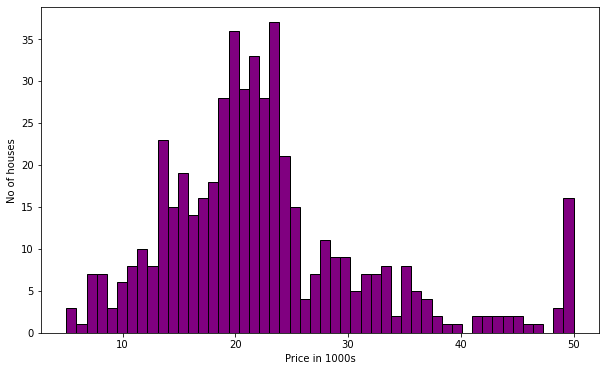

In [15]:
plt.figure( figsize=[10,6])
plt.hist( data['PRICE'] , bins = 50 , ec = 'black' , color='purple')
plt.xlabel('Price in 1000s')
plt.ylabel('No of houses')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


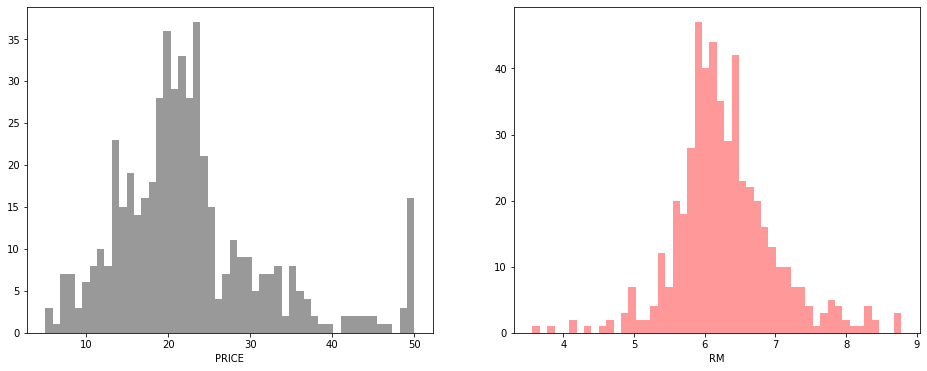

In [16]:
plt.figure( figsize=[16,6])
plt.subplot(1,2,1)
sns.distplot( data['PRICE'] , bins = 50 , hist = True , kde = False , color = 'Black')

plt.subplot(1,2,2)
sns.distplot( data['RM'] , bins = 50, kde = False , color = 'Red' )
plt.show()

In [17]:
data['RM'].mean()

6.284634387351787

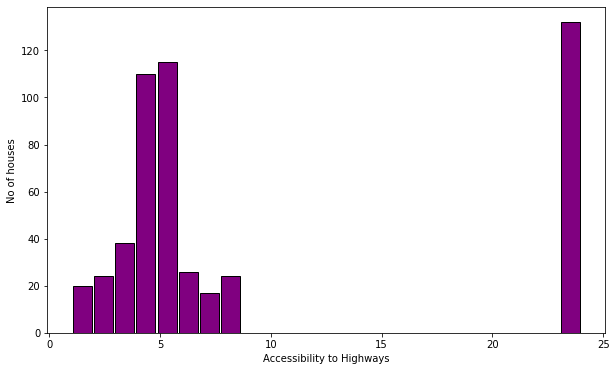

In [18]:
plt.figure( figsize=[10,6])
# Since we need the values to be seperate we need to explicitly state the bin value to be max of the data['RAD']
# Use a bar chart instead
plt.hist( data['RAD'] ,rwidth=0.9, bins = int(data['RAD'].max()), ec = 'black' , color = 'purple')
plt.xlabel('Accessibility to Highways')
plt.ylabel('No of houses')
plt.show()

In [19]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

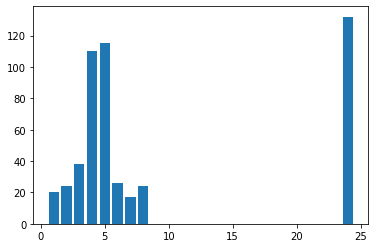

In [20]:
frequency = data['RAD'].value_counts()

# frequency.index
# frequency.axes[0]

plt.bar( frequency.index , height = frequency)
plt.show()

In [21]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [22]:
data['PRICE'].min()

5.0

In [23]:
data['PRICE'].max()

50.0

In [24]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [25]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [26]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [27]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [28]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
### $$\rho_XY = corr(X,Y)$$
### $$ -1.0 \leq \rho_XY \leq +1.0$$

In [29]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [30]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [31]:
data.corr() # Pearson correlation coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [32]:
mask = np.zeros_like( data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

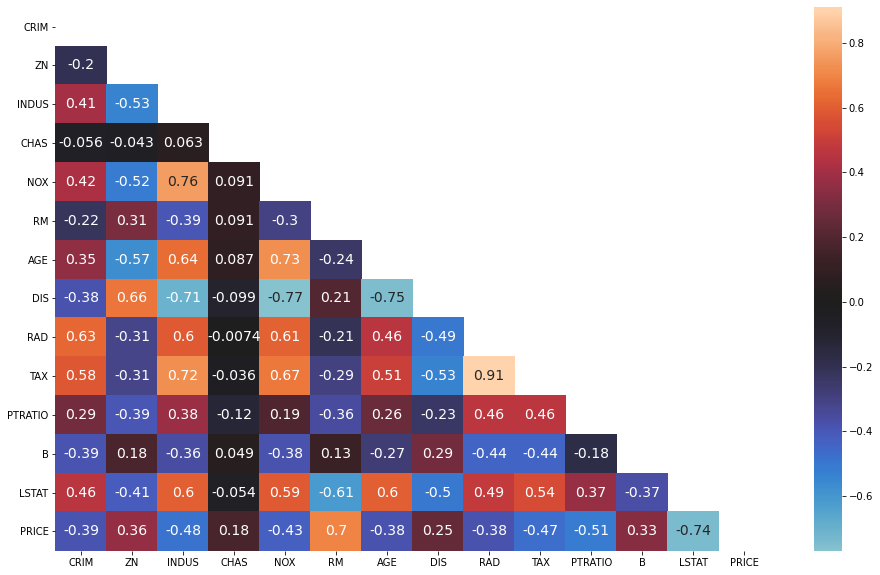

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr() ,center = 0, mask = mask , annot = True , annot_kws = {"size" : 14} )
plt.show()

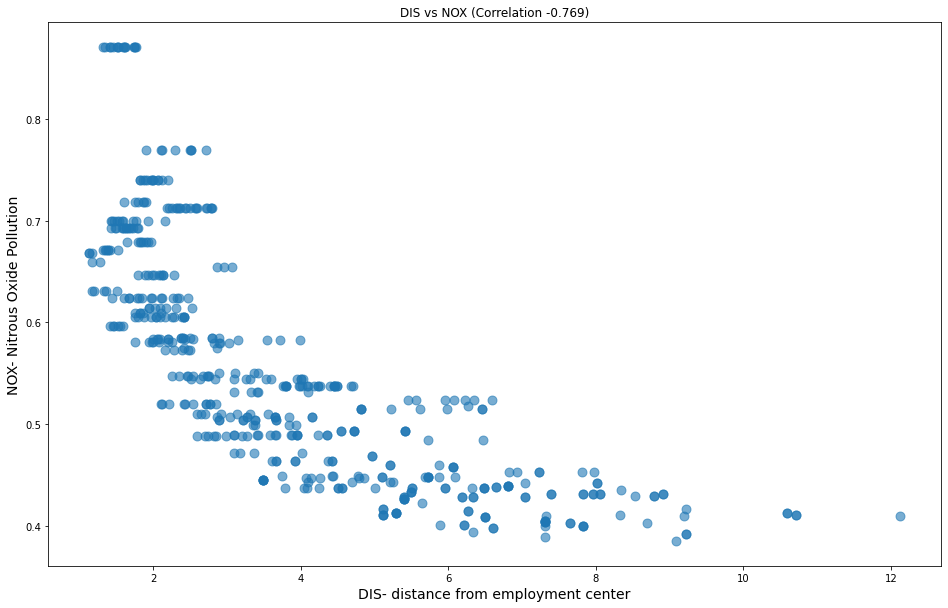

In [34]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']) , 3)

plt.figure(figsize=[16,10])
plt.title(f"DIS vs NOX (Correlation {nox_dis_corr})")
plt.xlabel('DIS- distance from employment center', fontsize = 14)
plt.ylabel('NOX- Nitrous Oxide Pollution' , fontsize = 14)
plt.scatter( data['DIS'] , data['NOX'] , alpha = 0.6 , s=80)
plt.show()

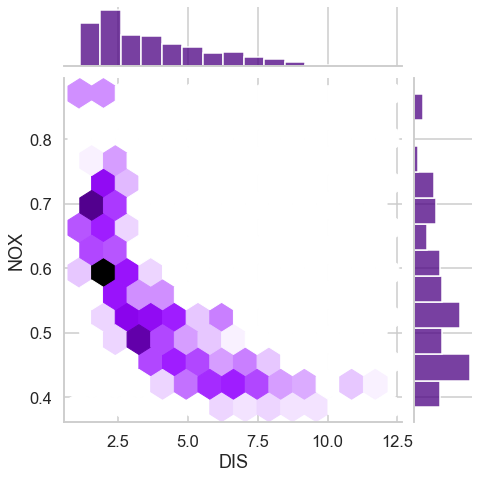

In [35]:
sns.set() # resetting the style
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x = data['DIS'] , y = data['NOX'] , height = 7 , color='indigo', kind = 'hex' )
#               joint_kws={"alpha":0.5})
plt.show()

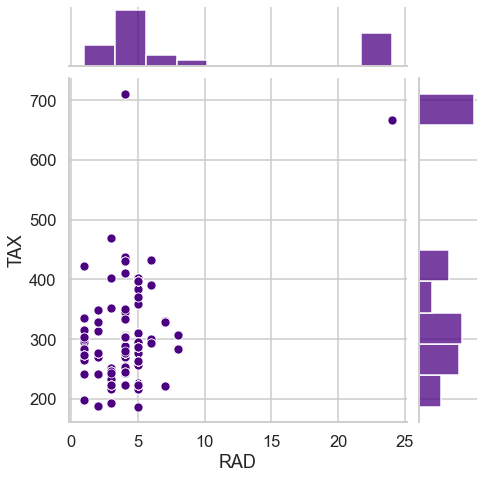

In [36]:
sns.set() # resetting the style
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x = data['RAD'] , y = data['TAX'] , height = 7 , color='indigo' )
#               joint_kws={"alpha":0.5})
plt.show()

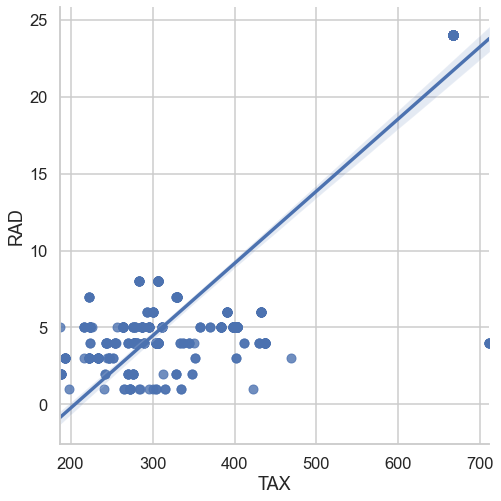

In [37]:
sns.lmplot(x = 'TAX' , y = 'RAD' , data = data , height=7)
plt.show()

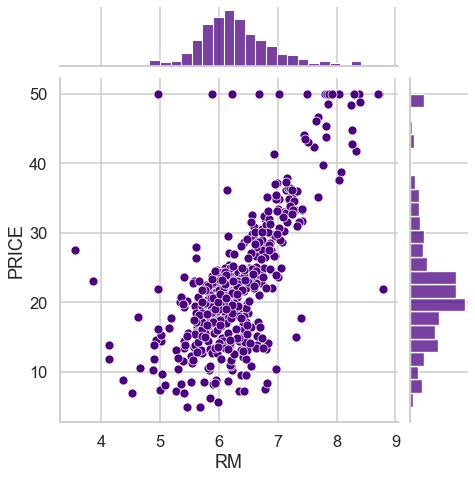

In [38]:
sns.set() # resetting the style
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x = data['RM'] , y = data['PRICE'] , height = 7 , color='indigo' )
#               joint_kws={"alpha":0.5})
plt.show()

In [39]:
# %%time

# sns.pairplot( data )
# plt.show()

In [40]:
# sns.pairplot(data , kind = 'reg' , plot_kws={"line_kws":{"color": 'cyan'}})
# plt.show()

## Training & Testing Dataset Split

In [41]:
prices = data['PRICE']
features = data.drop('PRICE' , axis=1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10 )

# % of training set
print( len(X_train) / len(features) )

# % of test data
print(  X_test.shape[0] / features.shape[0] )

0.7984189723320159
0.2015810276679842


## Multivariable Regression

In [42]:
regr = LinearRegression()

regr.fit( X_train , y_train )

print("R-squared value for training dataset: ", regr.score(X_train, y_train) )
print("R-squared value for testing dataset: ", regr.score(X_test, y_test) )

print('Intercept: ', regr.intercept_)
pd.DataFrame( data= regr.coef_ , index = X_train.columns , columns = ['coef'])


R-squared value for training dataset:  0.750121534530608
R-squared value for testing dataset:  0.6709339839115628
Intercept:  36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


# Data Transformation

In [43]:
data['PRICE'].skew()

1.1080984082549072

In [44]:
y_log = np.log(data['PRICE'])
y_log.skew()

-0.33032129530987864

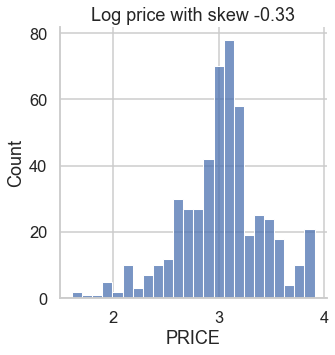

In [45]:
sns.displot(y_log)
plt.title(f'Log price with skew {round(y_log.skew() , 3)}')
plt.show()

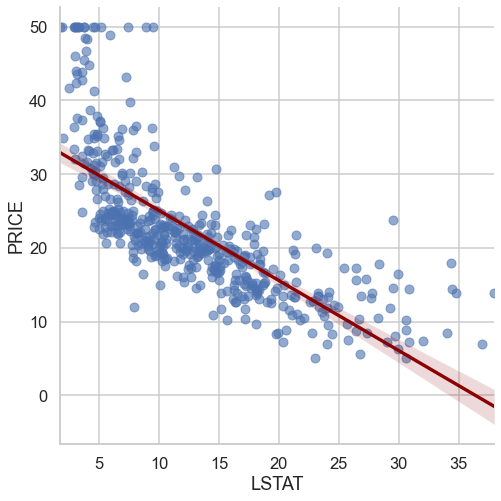

In [46]:
sns.lmplot( x = 'LSTAT' , y = 'PRICE' , data = data , height = 7 , scatter_kws= {"alpha": 0.6} , line_kws={"color":'darkred'})
plt.show()
# Doesn't fit the data as well as it could

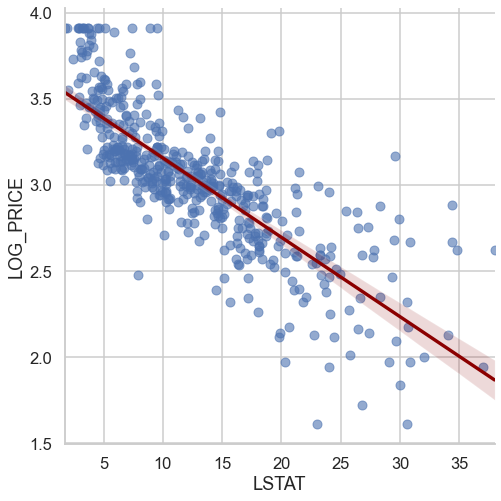

In [47]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot( x = 'LSTAT' , y = 'LOG_PRICE' , data = transformed_data , height = 7 , scatter_kws= {"alpha": 0.6} , line_kws={"color":'darkred'})
plt.show()

## Regression using log prices

In [48]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE' , axis=1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10 )

regr = LinearRegression()

regr.fit( X_train , y_train )

print("R-squared value for training dataset: ", regr.score(X_train, y_train) )
print("R-squared value for testing dataset: ", regr.score(X_test, y_test) )

print('Intercept: ', regr.intercept_)
pd.DataFrame( data= regr.coef_ , index = X_train.columns , columns = ['coef'])


R-squared value for training dataset:  0.7930234826697583
R-squared value for testing dataset:  0.7446922306260724
Intercept:  4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [49]:
# Charles River Property Premium
np.e**0.080331
# People want to pay 1084 dollars more to stay near the river

1.0836456950439142

## p values & evaluating co-efficients

In [50]:
X_incl_const = sm.add_constant( X_train )

model = sm.OLS( y_train , X_incl_const ) # gives us a linear regression model
results = model.fit()

# results.params
# results.pvalues

pd.DataFrame({'coef': results.params , 'p-values': round(results.pvalues,3)})
# Here Indus and Age are insignificant

,coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicolinearity

**First a regression will be run on that feature**

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12} LSTAT  $$

__Since, we are explaining TAX not property prices, only 12 factors will be considered__

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)}$$

In [51]:
for i in range( 1 , X_incl_const.shape[1] ):
    print("For column - " , i , ":", variance_inflation_factor( exog=X_incl_const.values , exog_idx=i ))

For column -  1 : 1.7145250443932485
For column -  2 : 2.3328224265597584
For column -  3 : 3.943448822674636
For column -  4 : 1.0788133385000578
For column -  5 : 4.410320817897635
For column -  6 : 1.8404053075678568
For column -  7 : 3.3267660823099408
For column -  8 : 4.222923410477865
For column -  9 : 7.314299817005058
For column -  10 : 8.508856493040817
For column -  11 : 1.839911632651406
For column -  12 : 1.3386713255364715
For column -  13 : 2.812544292793034


In [52]:
vif = []
for i in range( 1 , X_incl_const.shape[1] ):
    vif.append( variance_inflation_factor( exog=X_incl_const.values , exog_idx=i ))

In [53]:
vif = [(variance_inflation_factor( exog=X_incl_const.values , exog_idx=i ))
           for i in range( X_incl_const.shape[1] )]
pd.DataFrame({
    'coef_name': X_incl_const.columns,
    'vif': np.around(vif,2)
})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


# Model Simplification & the BIC

In [54]:
# Original model with log prices and all features
X_incl_const = sm.add_constant( X_train )

model = sm.OLS( y_train , X_incl_const ) # gives us a linear regression model
results = model.fit()


org_coef = pd.DataFrame({'coef': results.params , 'p-values': round(results.pvalues,3)})

print(results.rsquared)
print(results.bic)


0.7930234826697582
-139.74997769478875


In [55]:
# Reduced model excluding Indus And Age
X_incl_const = sm.add_constant( X_train )
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis=1)

model = sm.OLS( y_train , X_incl_const ) # gives us a linear regression model
results = model.fit()


coef_minus_indus = pd.DataFrame({'coef': results.params , 'p-values': round(results.pvalues,3)})

print(results.rsquared)
print(results.bic)


0.7918657661852815
-149.49934294224656


In [56]:
frames = [org_coef , coef_minus_indus]
pd.concat(frames, axis = 1)

,coef,p-values,coef,p-values
const,4.059944,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN
CHAS,0.080331,0.038,0.086449,0.025
NOX,-0.704068,0.000,-0.616448,0.000
RM,0.073404,0.000,0.076133,0.000
AGE,0.000763,0.209,NaN,NaN
DIS,-0.047633,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.013743,0.000


# Residuals & Residual Plots

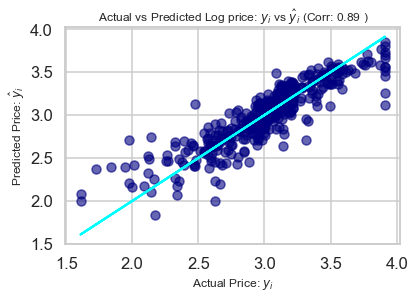

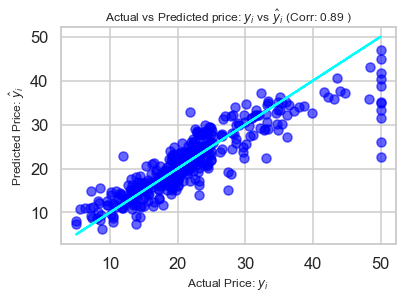

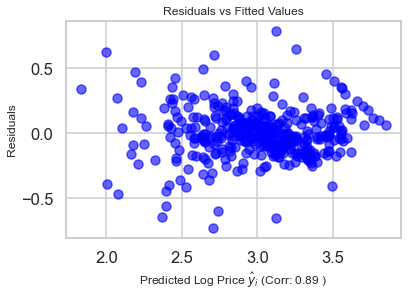

In [57]:
# Simplified by dropping two features
prices = np.log(data['PRICE'])
features = data.drop(['PRICE' , 'AGE' , 'INDUS'] , axis=1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10 )


# Using statsmodel
X_incl_const = sm.add_constant( X_train )

model = sm.OLS( y_train , X_incl_const ) # gives us a linear regression model
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

#Graph of Actual vs Predicted Price
corr = round( y_train.corr(results.fittedvalues ) , 2 )

plt.scatter( x = y_train , y = results.fittedvalues , color='navy', alpha = 0.6)
# Perfect prediction
plt.plot(y_train, y_train, c = 'cyan')
plt.title(f'Actual vs Predicted Log price: $y_i$ vs $\hat y_i$ (Corr: {corr} )' , fontsize = 12)
plt.xlabel('Actual Price: $y_i$',fontsize=12)
plt.ylabel('Predicted Price: $\hat y_i$',fontsize=12)
plt.show()


# for actual prices
plt.scatter( x = np.e**y_train , y = np.e**results.fittedvalues , color='blue', alpha = 0.6)
# Perfect prediction
plt.plot(np.e**y_train, np.e**y_train, c = 'cyan')
plt.title(f'Actual vs Predicted price: $y_i$ vs $\hat y_i$ (Corr: {corr} )' , fontsize = 12)
plt.xlabel('Actual Price: $y_i$',fontsize=12)
plt.ylabel('Predicted Price: $\hat y_i$',fontsize=12)
plt.show()


# Residuals vs Log Prices
plt.scatter( x = results.fittedvalues , y = results.resid , color='blue', alpha = 0.6)

plt.xlabel(f'Predicted Log Price $\hat y_i$ (Corr: {corr} )' , fontsize = 12)
plt.ylabel('Residuals',fontsize=12)
plt.title('Residuals vs Fitted Values',fontsize=12)
plt.show()


# Mean Sqaured Error # R-squared
reduced_log_mse = round(results.mse_resid , 3)
reduced_log_rsquared = round(results.rsquared , 3)


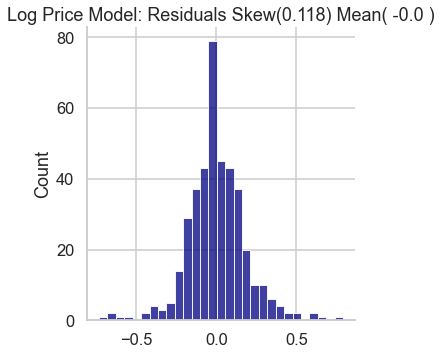

In [58]:
# Distribution of residuals( log prices) = checking for normality
resid_mean = round(results.resid.mean(),3)
resid_skew = round( results.resid.skew() , 3)

sns.displot(results.resid , color = 'navy')
plt.title(f'Log Price Model: Residuals Skew({resid_skew}) Mean( {resid_mean} )')
plt.show()

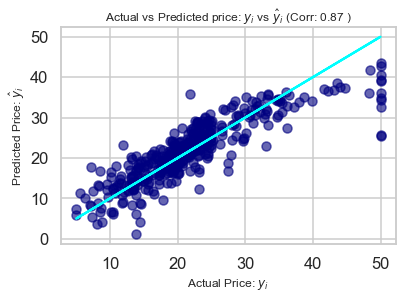

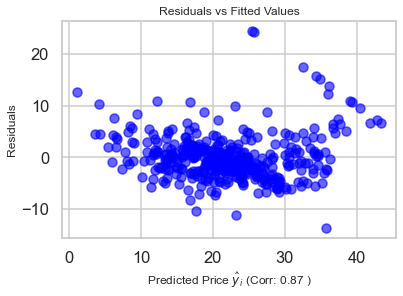

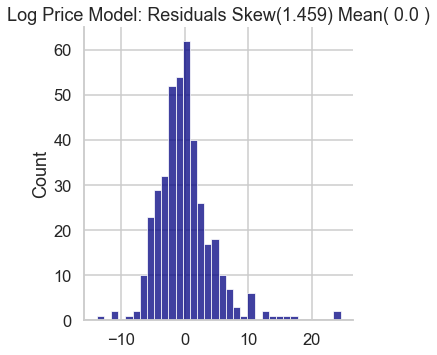

In [59]:
# Generating Plots for the original dataset

## Actual vs predicted Price ( including correlation )

original_prices = data['PRICE'] 
original_features = data.drop(['PRICE'] , axis = 1 )

X_train , X_test , y_train , y_test = train_test_split(original_features , original_prices , test_size = 0.2 , random_state = 10 )

# Using statsmodel
X_incl_const = sm.add_constant( X_train )

model = sm.OLS( y_train , X_incl_const ) # gives us a linear regression model
results = model.fit()

#Graph of Actual vs Predicted Price
corr = round( y_train.corr(results.fittedvalues ) , 2 )

plt.scatter( x = y_train , y = results.fittedvalues , color='navy', alpha = 0.6)
# Perfect prediction
plt.plot(y_train, y_train, c = 'cyan')
plt.title(f'Actual vs Predicted price: $y_i$ vs $\hat y_i$ (Corr: {corr} )' , fontsize = 12)
plt.xlabel('Actual Price: $y_i$',fontsize=12)
plt.ylabel('Predicted Price: $\hat y_i$',fontsize=12)
plt.show()



## Residual vs Predicted Price
plt.scatter( x = results.fittedvalues , y = results.resid , color='blue', alpha = 0.6)

plt.xlabel(f'Predicted Price $\hat y_i$ (Corr: {corr} )' , fontsize = 12)
plt.ylabel('Residuals',fontsize=12)
plt.title('Residuals vs Fitted Values',fontsize=12)
plt.show()

## Distribution of residuals
resid_mean = round(results.resid.mean(),3)
resid_skew = round( results.resid.skew() , 3)

sns.displot(results.resid , color = 'navy')
plt.title(f'Log Price Model: Residuals Skew({resid_skew}) Mean( {resid_mean} )')
plt.show()

# Mean Sqaured Error # R-squared
full_normal_mse = round(results.mse_resid , 3)
full_normal_rsquared = round(results.rsquared , 3)



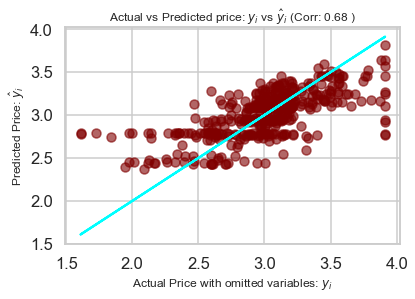

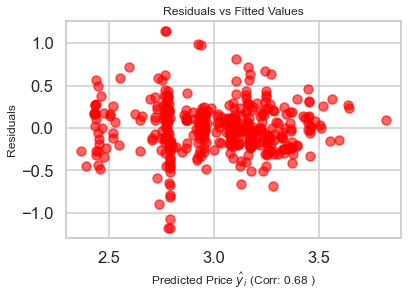

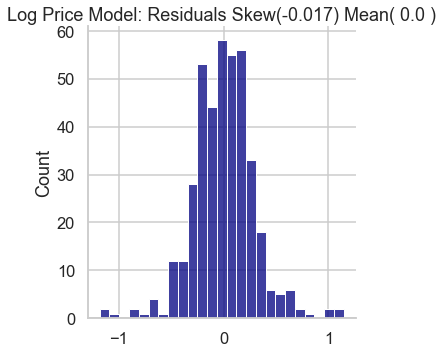

In [60]:
# Generating Plots for the original dataset

## Actual vs predicted Price ( including correlation )

original_prices = np.log(data['PRICE']) 
original_features = data.drop(['PRICE', 'INDUS', 'AGE' , 'LSTAT' , 'RM' , 'NOX' , 'CRIM'] , axis = 1 )

X_train , X_test , y_train , y_test = train_test_split(original_features , original_prices , test_size = 0.2 , random_state = 10 )

# Using statsmodel
X_incl_const = sm.add_constant( X_train )

model = sm.OLS( y_train , X_incl_const ) # gives us a linear regression model
results = model.fit()

#Graph of Actual vs Predicted Price
corr = round( y_train.corr(results.fittedvalues ) , 2 )

plt.scatter( x = y_train , y = results.fittedvalues , color='maroon', alpha = 0.6)
# Perfect prediction
plt.plot(y_train, y_train, c = 'cyan')
plt.title(f'Actual vs Predicted price: $y_i$ vs $\hat y_i$ (Corr: {corr} )' , fontsize = 12)
plt.xlabel('Actual Price with omitted variables: $y_i$',fontsize=12)
plt.ylabel('Predicted Price: $\hat y_i$',fontsize=12)
plt.show()



## Residual vs Predicted Price
plt.scatter( x = results.fittedvalues , y = results.resid , color='red', alpha = 0.6)

plt.xlabel(f'Predicted Price $\hat y_i$ (Corr: {corr} )' , fontsize = 12)
plt.ylabel('Residuals',fontsize=12)
plt.title('Residuals vs Fitted Values',fontsize=12)
plt.show()

## Distribution of residuals
resid_mean = round(results.resid.mean(),3)
resid_skew = round( results.resid.skew() , 3)

sns.displot(results.resid , color = 'navy')
plt.title(f'Log Price Model: Residuals Skew({resid_skew}) Mean( {resid_mean} )')
plt.show()

# Mean Sqaured Error # R-squared
omitted_var_mse = round(results.mse_resid , 3)
omitted_var_rsquared = round(results.rsquared , 3)



In [62]:
pd.DataFrame({'R-squared' : [reduced_log_rsquared , full_normal_rsquared , omitted_var_rsquared],
            'MSE': [reduced_log_mse , full_normal_mse , omitted_var_mse],
             'RMSE': np.sqrt([reduced_log_mse , full_normal_mse , omitted_var_mse])},
            index = ['Reduced Log Model', 'Full Normal Price Model' , 'Omitted Variable Model'])


,R-squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Omitted Variable Model,0.460,0.090,0.300000


In [70]:
# Estimating range for a certain house price of 30000 usd
estimated_price = np.log( 30 )
upper_bound = estimated_price + 2 * np.sqrt( reduced_log_mse )
lower_bound = estimated_price - 2 * np.sqrt( reduced_log_mse )
print( upper_bound , lower_bound )
print( np.e**upper_bound *1000 , np.e**lower_bound * 1000)

3.7753631203395495 3.0270316429847615
43613.34233239937 20635.886906824155
